In [37]:
import numpy as np
import mltools as ml
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
from logisticClassify2 import *
# %matplotlib inline
plt.style.use('/Users/brookeryan/Developer/CS273A Homework/seawitch.mplstyle')

# Problem 1: Logistic Regression

In [38]:
iris = np.genfromtxt("../data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]   # get first two features & target
X,Y  = ml.shuffleData(X,Y)       # reorder randomly (important later)
X,_  = ml.transforms.rescale(X)  # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]        # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]        # get class 1 vs 2

1.a) Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not.

Text(0.5, 1.0, 'Data B')

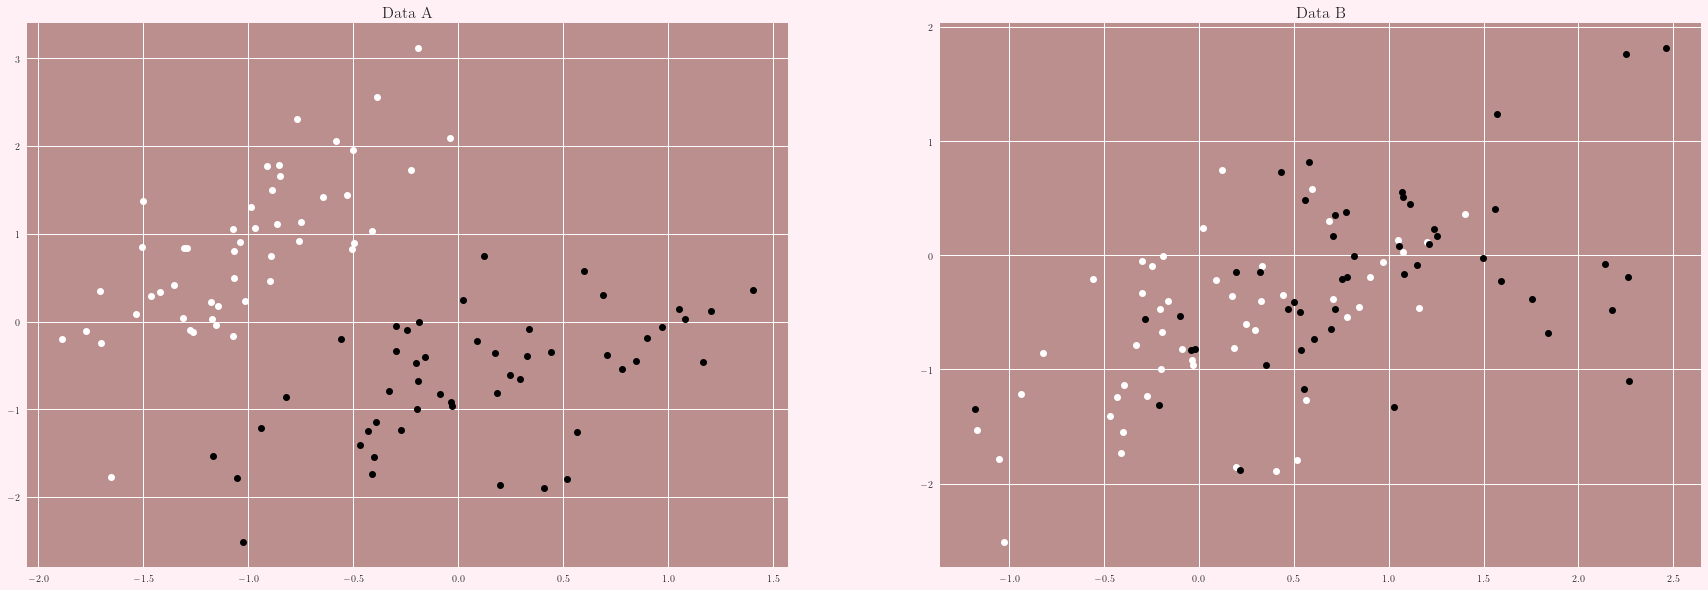

In [39]:
fig, ax = plt.subplots(1,2,  figsize=(30, 10))
ml.plotClassify2D(None, XA, YA, axis=ax[0])
ml.plotClassify2D(None, XB, YB, axis=ax[1])

ax[0].set_title("Data A")
ax[1].set_title("Data B")

To be **linearly separable** means that the data can be separated by a linear classifier.  A line could separate the two classes of data in Data A, while a line could not separate the different classes of points in Data B.

2) Write (fill in) the function `plotBoundary` in `logisticClassify2.py` to compute the points on the decision boundary.  In particular, you only need to make sure `x2b` is set correctly using `self.theta`. This will plot the data & boundary quickly, which is useful for visualizing the model during training.

To demo your function plot the decision boundary corresponding to the classifier $sign(0.5 - 0.25x_1 + 1x_2)$ along with the A data, and again with the B data; these fixed parameters will look like an OK classifier on one data set, but a poor classifier on the other.  Include the lines of code you added to the function, and the two generated plots. (10 points)

#### Data A
(i.e. the "OK" classifier)

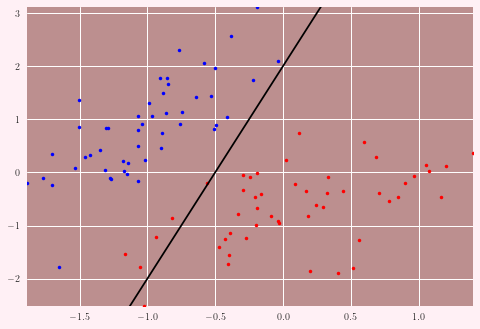

In [40]:
theta0, theta1, theta2 = 0.5, 1, -0.25  # Filling in values of theta from sign classifier formula

learnerA = logisticClassify2()           # create "blank" learner
learnerA.classes = np.unique(YA)         # define class labels using YA or YB
wts = np.array([theta0, theta1, theta2])  # TODO: fill in values
learnerA.theta = wts                     # set the learner’s parameters
learnerA.plotBoundary(XA,YA)

#### Data B
(the "poor" classifier)

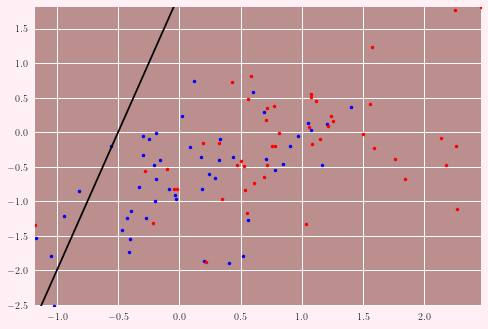

In [41]:
learnerB = logisticClassify2()           # create "blank" learner
learnerB.classes = np.unique(YB)         # define class labels using YA or YB
wts = np.array([theta0, theta1, theta2])  # TODO: fill in values
learnerB.theta = wts                     # set the learner’s parameters
learnerB.plotBoundary(XB, YB)

#### Code added to `plotBoundary`:

In [42]:
""" Plot the (linear) decision boundary of the classifier, along with data """
def plotBoundary(self, X, Y):
    if len(self.theta) != 3:
        raise ValueError('Data & model must be 2D')

    ax = X.min(0), X.max(0)
    ax = (ax[0][0], ax[1][0], ax[0][1], ax[1][1])

    x1b = np.array([ax[0], ax[1]])  # at X1 = points in x1b
    ## ------ ADDED LINE: -------
    x2b = - (self.theta[0] + self.theta[1] * x1b) / self.theta[2]  # TODO find x2 values as a function of x1's values
    ## --------------------------

    A = (Y == self.classes[0])  # and plot it:
    plt.plot(X[A, 0], X[A, 1], 'b.', X[~A, 0], X[~A, 1], 'r.', x1b, x2b, 'k-')
    plt.axis(ax)
    plt.draw()

3) Complete the `logisticClassify2.predict` function to make predictions for your classifier.  Verify that your function works by computing and reporting the error rate of the classifier in the previous part on both data sets A and B.  (The error rate on one should be $\approx$ 0.0505, and higher on the other).  Note that, in the code, the two classes are stored in the variable `self.classes`, with the first entry being the "negative" class (or class 0), and the second entry being the "positive" class, so you want to have different learner objects for each data set, amd you use `learner.err` directly.   Include the function definition and the two computed errors.

#### Code added to `logisticClassify2.predict`:

In [43]:
""" Return the predicted class of each data point in X"""
def predict(self, X):
    r = np.zeros(X.shape[0])
    Yhat = np.zeros(X.shape[0])

    ## Compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
    for i in range(X.shape[0]):
        r[i] = self.theta[0] + self.theta[1] * X[i, 0] + self.theta[2] * X[i, 1]
        if r[i] > 0: Yhat[i] = self.classes[1]          ## Predict class 1
        else: Yhat[i] = self.classes[0]                 ## Predict class 0

    return Yhat

#### Error Rates of Datasets

In [44]:
print('Error rate of dataset A:', learnerA.err(XA, YA))
print('Error rate of dataset B:', learnerB.err(XB, YB))

Error rate of dataset A: 0.050505050505050504
Error rate of dataset B: 0.46464646464646464


4) Verify that your predict code matches your boundary plot by using `plotClassify2D` with your manually constructed learner on the two datasets.  This will call `predict` on a dense grid of points, and you should find that the resulting decision boundary matches the one you computed analytically.  (5 points)

Text(0.5, 1.0, 'Data B Predict')

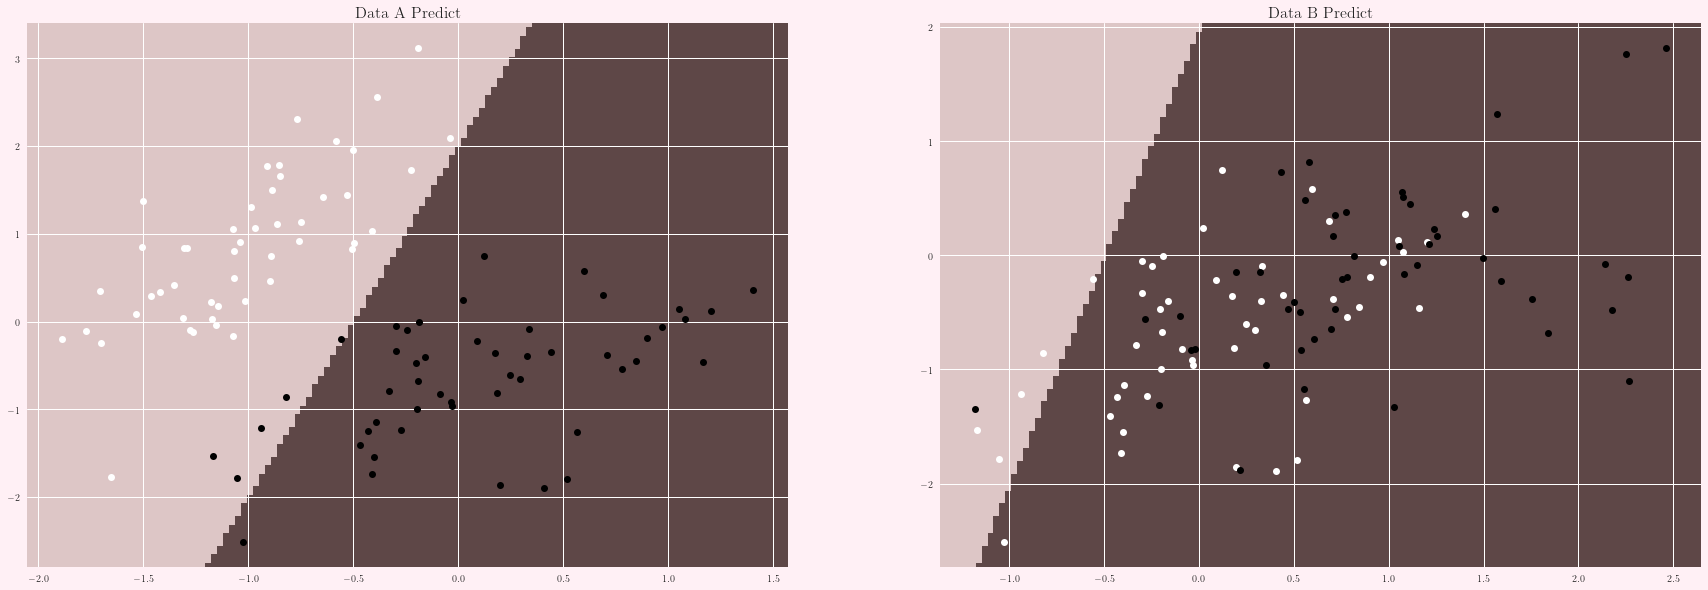

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ml.plotClassify2D(learnerA, XA, YA, axis=ax[0])
ml.plotClassify2D(learnerB, XB, YB, axis=ax[1])

ax[0].set_title("Data A Predict")
ax[1].set_title("Data B Predict")

We can see from comparing the two Predict figures to their respective Plot figures above, that the `plot` and `predict` functions are computing the manual classifier and decision boundaries correctly.

5) In the previous code, we first transform the classes in the data Y into YY, with canonical labels for the two classes: "class 0" (negative) and "class 1" (positive).  In our notation, let $r^j = x^j * \Theta^T$ be the linear response of the classifier, and $\sigma$ is the standard logistic function $\sigma(r) = (1+exp(-r))^{-1}$.  The logistic negative log likelihood loss for a single data point $j$ is then $J_j(\Theta) = -y^jlog \sigma (x^j \Theta^T) - (1-y^j)log(1 - \sigma(x^j \Theta^T))$, where $y^j$ is either 0 or 1.

#### Derive the gradient of the negative log likelihood $J_j$ for logistic regression.

#### Standard Logistic Regression

$$\sigma(r)=\frac{1}{1+e^{-r}}$$

Using the chain rule:
$$\Rightarrow \frac{\partial \sigma(r)}{\partial r}=\sigma(r)(1-\sigma(r))$$

#### Logistic Negative Log Likelihood

$$J_j(\theta)=-y^{(j)}log \sigma(x^{(j)}\theta^T)-(1-y^{(j)})log(1-\sigma(x^{(j)}\theta^T))$$

$$ \frac{\partial J_j(\theta)}{\partial \theta}=-y^{(j)}[1-\sigma(x^{(j)}\theta^T)]x^{(j)}+(1-y^{(j)})\sigma(x^{(j)}\theta^T)x^{(j)}$$

$$ \Rightarrow \frac{\partial J_j(\theta)}{\partial \theta}=x^{(j)}[\sigma(x^{(j)}\theta^T)-y^{(j)}] $$

#### Provide the gradient equations for $\frac{\partial}{\partial\Theta_0} J_j, \frac{\partial}{\partial\Theta_1} J_j, \frac{\partial}{\partial\Theta_2} J_j$.

$$\frac{\partial}{\partial \theta_0}J_j=\sigma(x^{(j)}\theta^T)-y^{(j)}$$

$$\frac{\partial}{\partial \theta_1}J_j=x_1[\sigma(x^{(j)}\theta^T)-y^{(j)}]$$

$$\frac{\partial}{\partial \theta_2}J_j=x_2[\sigma(x^{(j)}\theta^T)-y^{(j)}]$$

6) Complete the `train` function to perform stochastic gradient descent on the logistic loss function.

In [46]:
""" Static helper method """
def sigmoid(r):
    return 1/(1+np.exp(-r))

""" Train the logistic regression using stochastic gradient descent """
def train(self, X, Y, init_step=1.0, stop_tol=1e-4, stop_epochs=5000, plot=True):
   M, N = X.shape                   # initialize the model if necessary:
   self.classes = np.unique(Y)      # Y may have two classes, any values
   XX = np.hstack((np.ones((M,1)),X))
   YY = ml.toIndex(Y,self.classes)

   if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);

   epoch = 0
   converged = False
   jnll = [np.inf]
   j01 = [np.inf]

   while not converged:
       step_size, epoch = init_step*2.0/(2.0+epoch), epoch+1

       for i in np.random.permutation(M):
           ri = np.dot(self.theta,XX[i,:])
           grad_i = (sigmoid(ri)-YY[i])*XX[i,:]
           self.theta -= step_size * grad_i  # take a gradient step

       j01.append(self.err(X,Y))
       jsur = []

       for i in np.random.permutation(M):
           jsur.append(-np.log(sigmoid(np.dot(self.theta, XX[i,:]))) \
           if YY[i]==1 else -np.log(1-sigmoid(np.dot(self.theta, XX[i,:]))))

       jnll.append(np.mean(jsur))

       converged = (epoch > stop_epochs) or np.abs(jnll[-2] - jnll[-1]) < stop_tol

   if plot:
       print('Converged after %d iterations.  Final surrogate loss = %.3f; error rate = %.3f' % (epoch, jnll[-1], j01[-1]))
       plt.figure(1); plt.plot(jnll,'b-',label='surrogate loss')
       plt.plot(j01,'r-',label='error rate ');plt.xlabel("epoch")
       plt.title("Losses")
       plt.draw()

       # plot Boundary
       if N==2:
           plt.figure(2)
           self.plotBoundary(X,Y)
           plt.title("Boundary")
           plt.draw()

   return self.theta, epoch, jnll[-1], j01[-1]

7) Run `train` for your logistic regression classifier on both data sets (A and B).  Describe your parameter choices for each dataset (A and B).  Describe your parameter choices for each dataset (stepsize, etc.) and include plots showing the convergence of the surrogate loss and error rate (e.g., the loss values as a function of epoch during gradient descent), and the final converged classifier with the data (the included `train` function does that for you already.)

Reached convergance after 14 iterations => Final surrogate loss                 is: 0.082, error rate is: 0.010
Final Theta:
[ 2.39482788  4.34148965 -2.71920306]


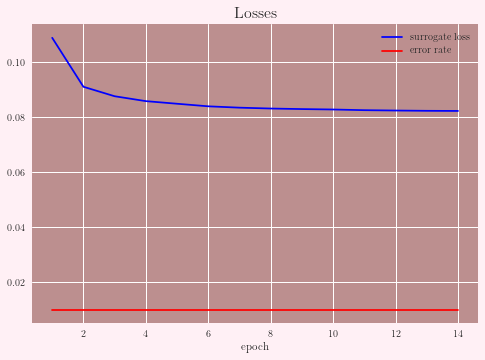

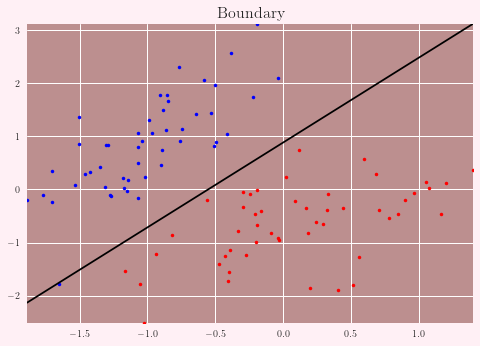

In [47]:
learnerA.train(XA, YA, init_step=0.5, stop_epochs=1000, alpha=0.001)
print ("Final Theta:")
print(learnerA.theta)

Reached convergance after 19 iterations => Final surrogate loss                 is: 0.547, error rate is: 0.242
Final Theta:
[-0.71170557  1.58710287  0.13828332]


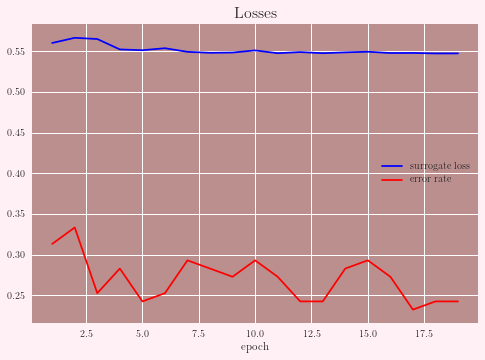

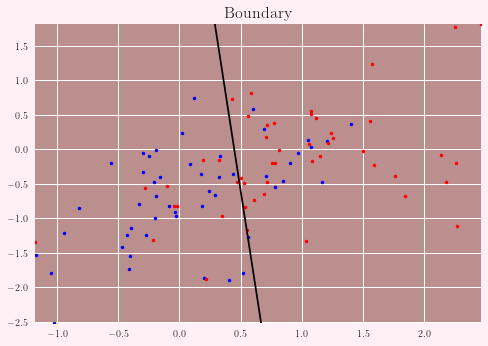

In [48]:
learnerB.train(XB, YB, init_step=0.5, stop_epochs=1000, alpha=0.001)
print ("Final Theta:")
print(learnerB.theta)

In regards to parameter selections for the different models, I found this to be an interesting, yet challenging, task.  In my Neural Networks class, we discussed how although the backbone of machine learning requires understanding deep mathematical proofs, the process of parameter selection is actually one that is more intuitive and based in know-how and trial and error.

I chose to make the number of epochs to reach a sweet spot between overfitting and underfitting--if there are too few epochs, then the model will not be sufficiently powerful to solve the problem.  However if we have too high epochs, then the model will become overfitted, and will begin to lose its ability to apply its problem-solving to other problems, which is something we want to avoid.
For epochs I tested, between 500 to 1000 seemed to reach that sweet spot state, so I chose to leave it at the higher end of that to err towards a more powerful model.

For the alpha parameter, as alpha increased, I noticed that the final Theta parameter decreased, causing the error rate to increase.  To attempt to minimize the error rate, I tried to make alpha small.

# Problem 2: Shattering

#### Which of the four datasets can be shattered by each learner?  Give a brief explanation/justification and use your results to guess the VC dimension of the classifier (you do not have to give a formal proof, just your reasoning).

1) $$T(a + bx_1)$$

This learner has two parameters $a$ and $b$, and a perceptron on one feature $x_1$.

VC Dim = 2

A linear learner would be able to shatter either Dataset A or Dataset B, because a line $a + bx_1 = 0$ would be able to take a class value on either side of the line.

However, it could not shatter $c$ or $d$.

2) $$T((a*b)x_1 + (\frac{c}{a}x_2)) $$

Consider m = a*b and $n = \frac{c}{a}$, since they are constants.

Therefore, there are essentially two parameters, and two features $x_1$ and $x_2$.  So, VCDim = 2.

Therefore with this learner, we'd be able to shatter Datasets A and B, but not C and D.

3) $$ T((x_1 -a)^2 + (x_2 - b)^2 + c)$$

Three parameters $a$, $b$, and $c$, and $VC Dim=3$.

Therefore, this learner should be able to shatter Dataset A, Dataset B, and Dataset C, but not Dataset D.

4) $$ T(a + bx_1 + cx_2) \times T(d + bx_1 + cx_2)$$.  **Hint**: The two equations are parallel lines.

There are four parameters given in this learner, $a$, $b$, $c$, and $d$, over two features $x_1$ and $x_2$.

To shatter Dataset A and B, we would simply need a line, which would be possible with this equation, since the parallel lines would work regardless for two points.

To shatter Dataset C, we can also do this, because two parallel lines could also separate those three points.

For Dataset D, I believe we would have to get creative.  If we set have the goal of $T$ being the equation of a circle which is of the form $x_1^2 + x_2^2 = r^2$, and we set the scalars $a, b, c, d$ appropriately, then we could position the circle iteratively over all different points of Dataset D to ensure that it is shatterable.

Therefore, all Datasets with this equation are able to be Shattered by this learner.

# Statement of Collaboration

All work is my own, and I abided by UCI's academic integrity policy.

Required Disclosure of Discussion of Classroom material: One of my teammates on Feb. 4 and I talked about VC dimensions, and how to visualize different learner functions on different sized data sets.  I used this insight to help me understand the parallel lines problem for part 4, however the written solution is completely my own.